Análisis de Datos

Grupo: 20

Tarea 4 - Algoritmos de Aprendizaje no Supervisado

Presentado por: Juan David meza

Código: 202016908

Tutor: Breyner Alexander Parra

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD


KMeans

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.decomposition import PCA  # Reducción de dimensionalidad

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Cargar el dataset
data = pd.read_csv("Mall_Customers.csv") 

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio

data.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
# Descripción de los datos
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


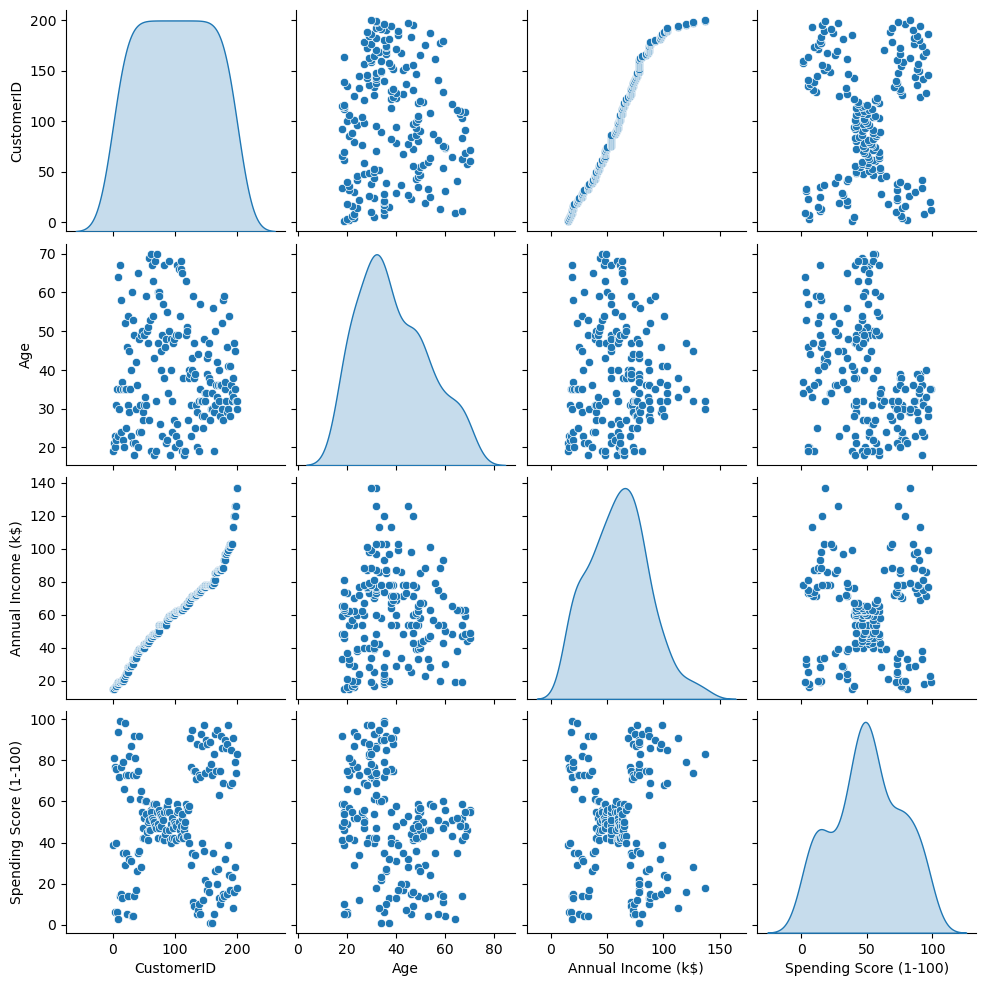

In [9]:
# Visualización inicial
sns.pairplot(data, diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

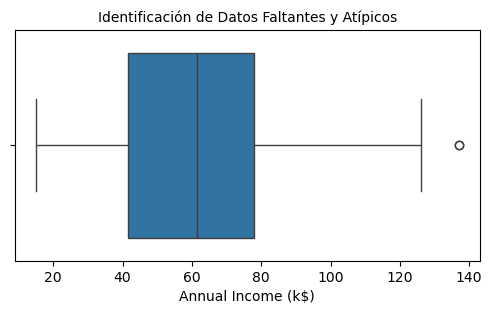

In [11]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [13]:
#Revisión de datos faltantes
print("Cantidad de Registros con cero en Gender: ",data['Gender'].isin([0]).sum())
print("Cantidad de Registros con cero en Age: ",data['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ",data['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ",data['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Gender:  0
Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


In [15]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

data['Salario_Mensual']=data['Annual Income (k$)'].replace(0,data['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atípicos')

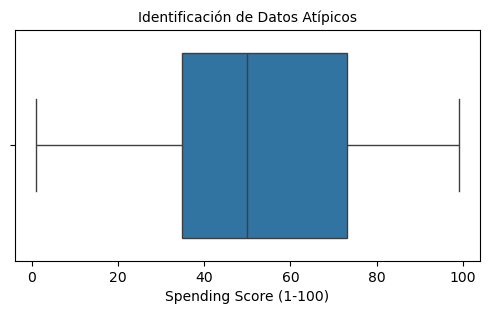

In [17]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [19]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((data['Spending Score (1-100)']<nivel_minimo)|(data['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [25]:
# Filtra Datos Atípicos

data=data[(data['Spending Score (1-100)']<nivel_maximo)&(data['Spending Score (1-100)']>nivel_minimo)]

In [29]:
#Revisión del tipo de datos y datos faltantes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Salario_Mensual         200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [31]:
# Filtrar columnas del modelo 

data = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [33]:
# Revisión de los datos de las variables objetivo

data.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


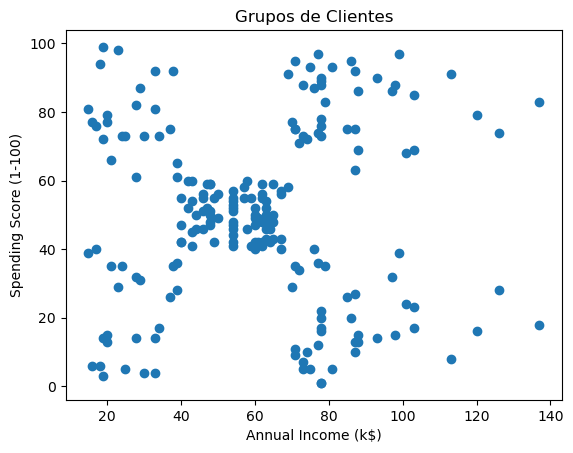

In [35]:
# Grafica antes del agrupamiento

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

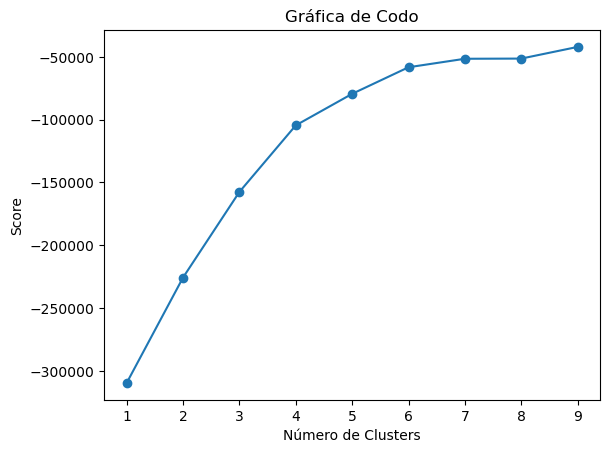

In [728]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [732]:
### Generación del modelo de Agrupamiento del modelo con K=6 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=6, random_state=10)
Modelo.fit(data)

KMeans(n_clusters=6, random_state=10)

In [734]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
data["Grupo"] = Modelo.labels_ 
print (data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      4
1     21                  15                      81      3
2     20                  16                       6      4
3     23                  16                      77      3
4     31                  17                      40      4
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      0
197   32                 126                      74      1
198   32                 137                      18      0
199   30                 137                      83      1

[200 rows x 4 columns]


In [736]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(data)
X = data.drop('Grupo', axis=1)
clusters = data['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.4523443947724053 |
| Indice Calinski Harabasz | 166.72049317886868 |
|  Indice Davies Bouldin   | 0.7469740072755284 |
+--------------------------+--------------------+


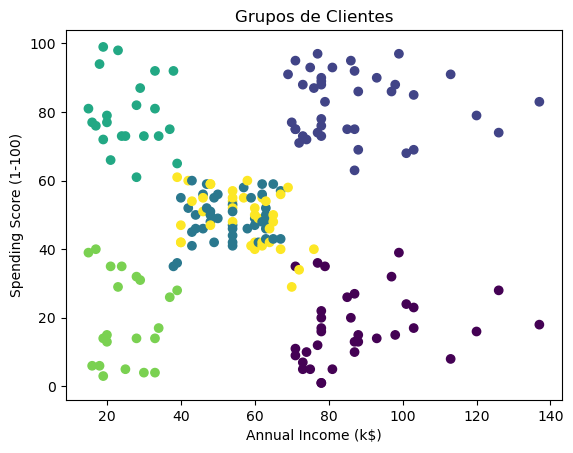

In [738]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

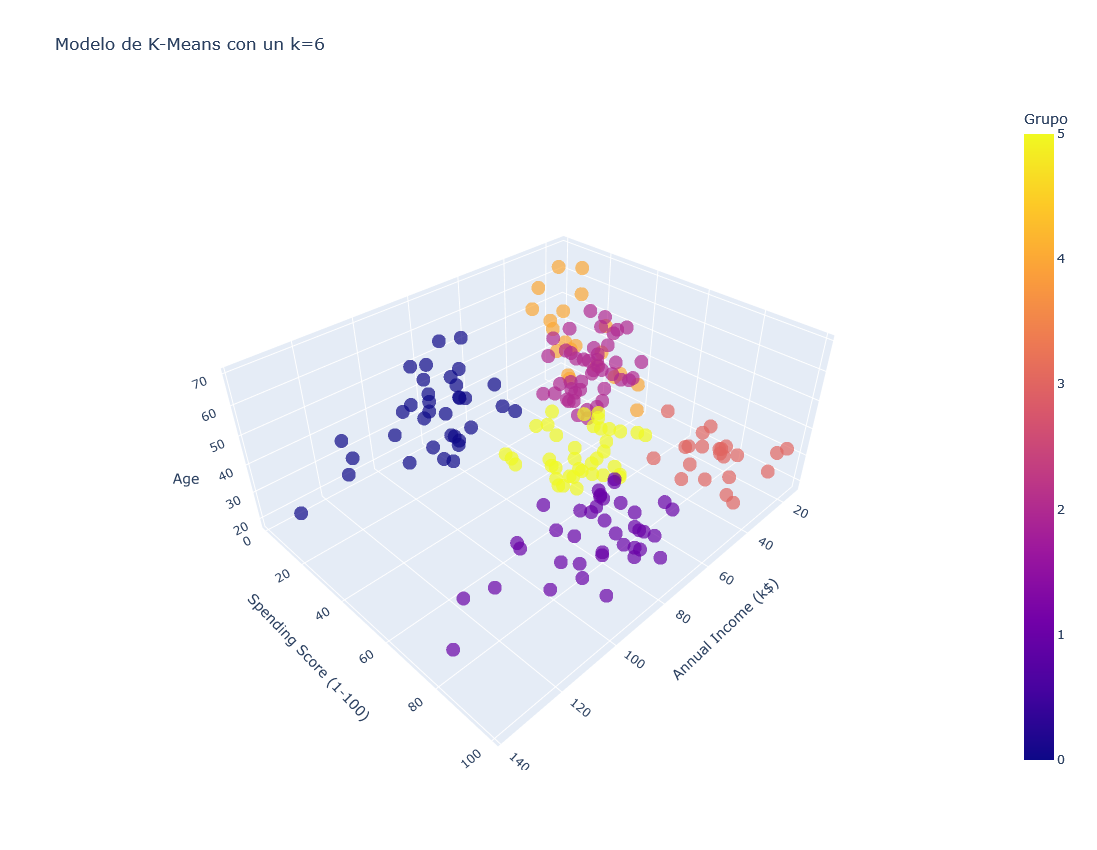

In [740]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={6}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False) 

Analsis del modelo

Coeficiente Silhouette: 0.452
El valor de 0.452 es moderadamente bueno. No es perfecto, pero muestra que los clusters están razonablemente bien definidos. Si el valor fuera más cercano a 1, podría indicar una separación más clara entre los clusters. Sin embargo, no es un valor bajo, por lo que los clusters tienen cierta separación y cohesión.

Índice Calinski-Harabasz: 166.72
Un valor de 166.72 es bastante alto, lo que indica que los clusters están bien separados y definidos. Este es un buen indicador de que el modelo ha hecho un buen trabajo al crear clusters distintos. En comparación con otros índices de dispersión, este es uno de los más relevantes para la calidad de los clusters.

Índice Davies-Bouldin: 0.75
El valor de 0.75 es relativamente bajo, lo que sugiere que los clusters están bien diferenciados entre sí. A medida que este valor disminuye, se mejora la calidad de la separación entre los clusters. En este caso, un valor de 0.75 indica que hay una separación razonable entre los clusters sin mucho solapamiento.